In [ ]:
#installing matplotlib package (latest version as of Apr 2025: 3.10.1)
#!pip install matplotlib

# 0. Configuration

We use graph models implemented in the ``NetworkX`` graph generators package. See documentation [here](https://networkx.org/documentation/stable/reference/generators.html).

``NetworkX`` provides a lot of different graph models, including:
- Erdős-Rényi model: ``gnm_random_graph(n, m[, seed, directed])``
- Erdős-Rényi-Gilbert model: ``fast_gnp_random_graph(n, p[, seed, directed])``
- Configuration model: ``configuration_model(deg_sequence[, ...])``
- Random graph model with given expected degrees: ``expected_degree_graph(w[, seed, selfloops])``
- Wattz-Strogatz (small-world) model: ``watts_strogatz_graph(n, k, p[, seed])``
- Stochastic Block Model: ``stochastic_block_model(sizes, p[, nodelist, ...])``
- Barabási–Albert model: ``barabasi_albert_graph(n, m[, seed, ...])``

In [1]:
import time
import random
import math
from collections import defaultdict
import networkx as nx

# 1. Graph drawing

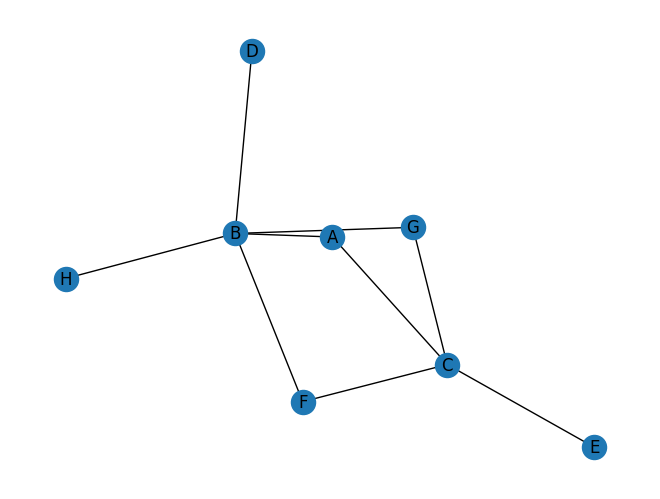

In [2]:
G = nx.Graph()
V = (['A','B','C','D','E','F','G','H'])
E = ([('A','B'),('A','C'),('B','D'),('B','F'),('B','G'),('B','H'),('C','E'),('C','G'),('C','F')])
G.add_nodes_from(V)
G.add_edges_from(E)
nx.draw(G, with_labels=True)

# 2. Properties of Erdős-Rényi-Gilbert random graphs

### 2.1 Graph generation

In [3]:
n = 2000
p = 0.005

G1 = nx.fast_gnp_random_graph(n, p)
G2 = nx.fast_gnp_random_graph(n, p)

In [4]:
print('G1 - number of vertices and edges: ' + str(G1.number_of_nodes()) + ', ' + str(G1.number_of_edges()))
print('G2 - number of vertices and edges: ' + str(G2.number_of_nodes()) + ', ' + str(G2.number_of_edges()))
print('Expected number of edges under the Erdős-Rényi-Gilbert model: ' + str(p*n*(n-1)/2))

G1 - number of vertices and edges: 2000, 9919
G2 - number of vertices and edges: 2000, 9892
Expected number of edges under the Erdős-Rényi-Gilbert model: 9995.0


### 2.2 Average degree

In [5]:
print('G1 - average degree: ' + str(2*G1.number_of_edges()/G1.number_of_nodes()))
print('G2 - average degree: ' + str(2*G2.number_of_edges()/G2.number_of_nodes()))
print('Expected average degree in Erdős-Rényi-Gilbert model: ' + str(p*(n-1)))

G1 - average degree: 9.919
G2 - average degree: 9.892
Expected average degree in Erdős-Rényi-Gilbert model: 9.995000000000001


### 2.3 Clustering coefficient

In [6]:
print('G1 - average clustering coefficient: ' + str(nx.average_clustering(G1)))
print('G2 - average clustering coefficient: ' + str(nx.average_clustering(G2)))
print('Expected average clustering coefficient in Erdős-Rényi-Gilbert model: ' + str(p))

G1 - average clustering coefficient: 0.005143774118038824
G2 - average clustering coefficient: 0.0043367730308906775
Expected average clustering coefficient in Erdős-Rényi-Gilbert model: 0.005


### 2.4 Giant component size

In [7]:
print('G1 - giant component size: ' + str(len(max(nx.connected_components(G1), key=len))))
print('G1 - giant component size: ' + str(len(max(nx.connected_components(G2), key=len))))
print('Probability threshold in Erdős-Rényi-Gilbert model to observe no isolated vertices: ' + str(2*math.log(n)/(n-1)))

G1 - giant component size: 2000
G1 - giant component size: 2000
Probability threshold in Erdős-Rényi-Gilbert model to observe no isolated vertices: 0.007604704811948056


### 2.4 Diameter

In [8]:
def diameter(G):
    return nx.diameter(G) if nx.is_connected(G) else float('inf')

In [10]:
print('G1 - diameter: ' + str(diameter(G1)))
print('G2 - diameter: ' + str(diameter(G2)))
print('Expected diameter in Erdős-Rényi-Gilbert model: ' + str(2*math.log(n)/math.log(p*(n-1))))

G1 - diameter: 6
G2 - diameter: 6
Expected diameter in Erdős-Rényi-Gilbert model: 6.603494280493791


### 2.5 Degree distribution

In [11]:
import matplotlib.pyplot as plt

In [12]:
def degree_distribution(G):
    all_degrees = sorted(list(dict(G.degree()).values()))
    
    degree2count = defaultdict(int)
    for deg in all_degrees:
        degree2count[deg] = degree2count[deg]+1
        
    degree2prob = defaultdict(float)
    for deg,count in degree2count.items():
        degree2prob[deg] = count/G.number_of_nodes()

    degrees = list(sorted(set(all_degrees)))

    return all_degrees, degrees, degree2count, degree2prob

In [13]:
def plot_degree_distribution(G, graph_name):
    all_degrees, degrees, degree2count, degree2prob = degree_distribution(G)
    plt.figure()
    plt.grid(False)
    plt.hist(all_degrees,bins=degrees[-1]) #number of bins equal to the max degree, i.e., bins of size 1
    plt.xlabel('degree k')
    plt.xticks(range(0,degrees[-1]+1))
    plt.ylabel('count n_k')
    plt.title(graph_name + ' - Degree histogram')
    plt.show()
    
    plt.figure()
    plt.grid(axis='x')
    plt.plot(degrees, degree2count.values(), 'ro-')
    plt.xlabel('degree k')
    plt.xticks(range(0,degrees[-1]+1))
    plt.ylabel('count n_k')
    plt.title(graph_name + ' - Degree distribution (count)')
    plt.show()
    
    plt.figure()
    plt.grid(axis='x')
    plt.plot(degrees, degree2prob.values(), 'ro-')
    plt.xlabel('degree k')
    plt.xticks(range(0,degrees[-1]+1))
    plt.ylabel('probability P_deg(k)')
    plt.title(graph_name + ' - Degree distribution (probability)')
    plt.show()
    
    plt.figure()
    plt.grid(axis='x')
    plt.loglog(degrees, degree2prob.values(), 'bo-')
    plt.xlabel('log degree log(k)')
    #plt.xticks(range(0,degrees[-1]+1))
    plt.ylabel('log probability log(P_deg(k))')
    plt.title(graph_name + ' - Degree distribution (probability) - Log-log scale')
    plt.show()

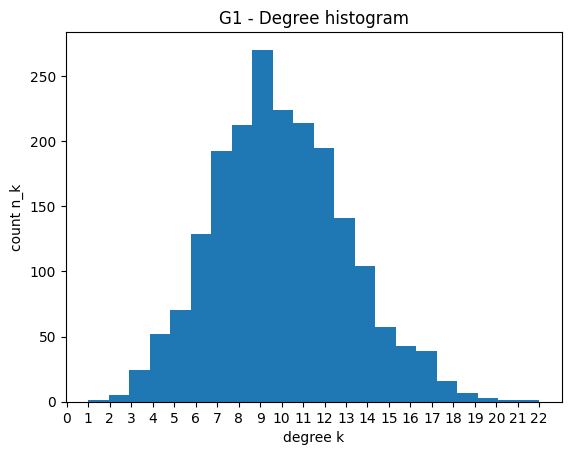

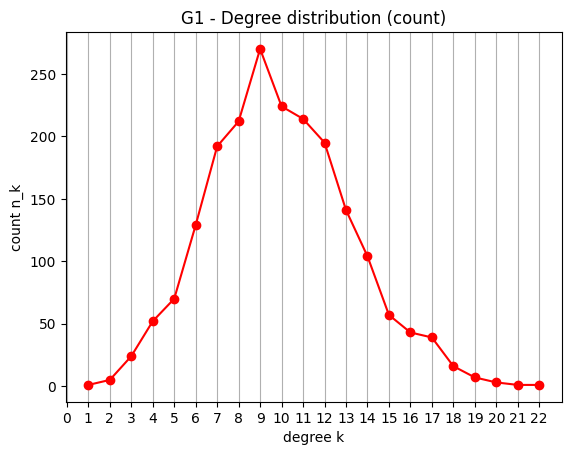

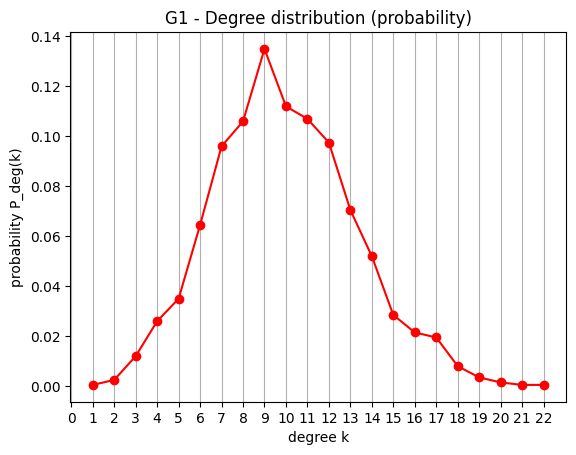

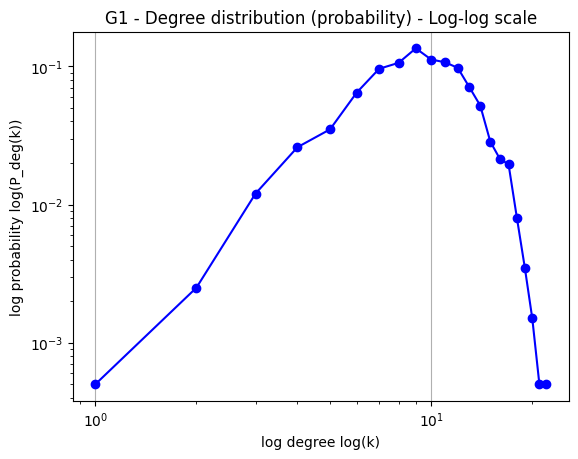

In [14]:
plot_degree_distribution(G1, 'G1')

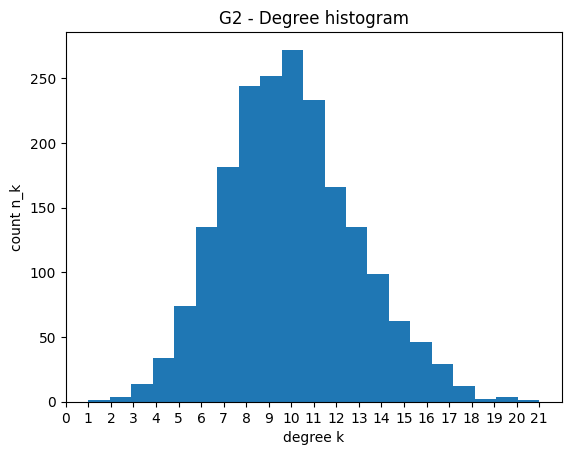

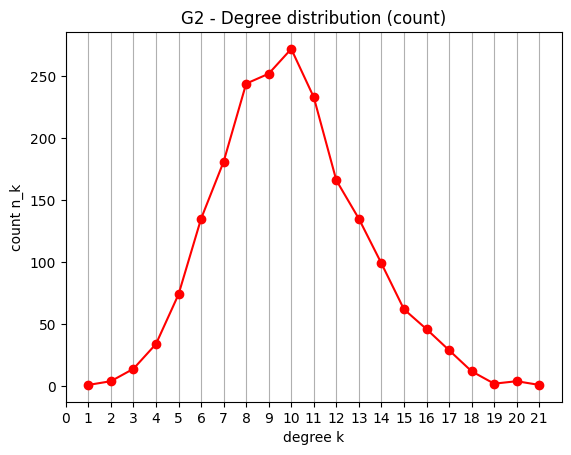

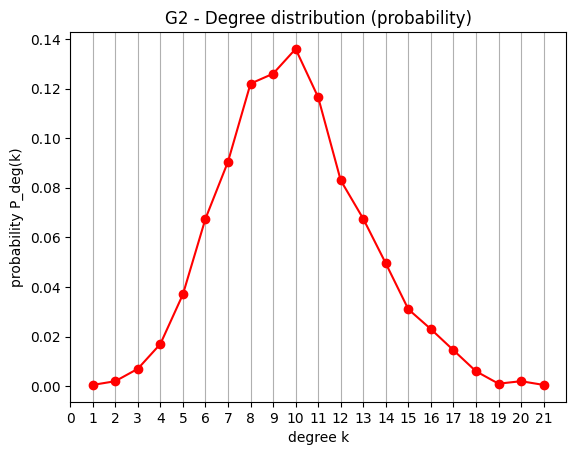

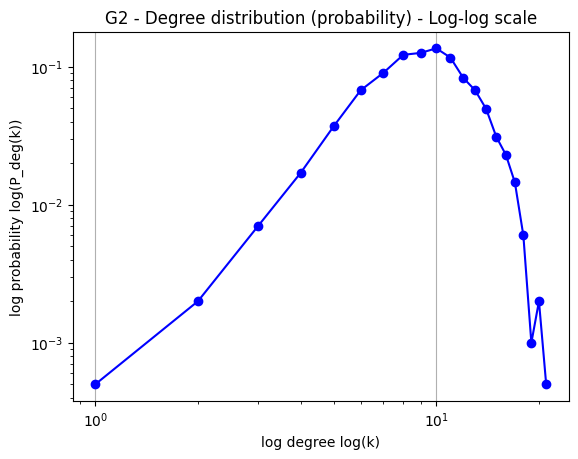

In [15]:
plot_degree_distribution(G2, 'G2')